In [45]:
import os
os.environ['PYARROW_IGNORE_TIMEZONE'] = '1'
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, col,min,max,mean
import time


In [46]:
from pyspark.sql import SparkSession

# Crée une session Spark
start_time = time.time()





spark = SparkSession.builder \
    .appName("YourAppName") \
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()



oct = "/home/ghani/Téléchargements/2019-Oct.csv"
nov = "/home/ghani/Téléchargements/2019-Nov.csv"
dec = "/home/ghani/Téléchargements/2019-Dec.csv"
jan = "/home/ghani/Téléchargements/2019-Jan.csv"
fev = "/home/ghani/Téléchargements/2019-Fev.csv"



df = spark.read.csv(csv_file_path, header=True, inferSchema=True)
df.show()



end_time = time.time()

loading_time = end_time - start_time
print(f"Temps de chargement des données: {loading_time:.2f} secondes")


+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 02:00:00|      view|  44600062|2103807459595387724|                NULL|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 02:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 02:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    NULL|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 02:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 02:00:04|      view|   1004237|2053013555631882655|electr

In [21]:
nombre_lignes = df.count()

print(f"Nombre de lignes: {nombre_lignes}")
print("prix moyenne")
#df.select (avg(col("price"))).show()
print("Calculer le minimum et le maximum d'une colonne spécifique")
#df.select(min(col("price")), max(col("price"))).show()
df.select(mean(col("price"))).show()

#df.groupBy("brand").count().show()
#df.groupBy("category_code").count().show()


Nombre de lignes: 42448764
prix moyenne
Calculer le minimum et le maximum d'une colonne spécifique


+-----------------+
|       avg(price)|
+-----------------+
|290.3236606848809|
+-----------------+



In [44]:
#pdf = df.groupBy("category_code").count().toPandas()
dft=df.toPandas()





AttributeError: 'NoneType' object has no attribute 'setCallSite'

In [39]:

amazing_df = pdf[pdf['category_code'] == 'Amazing']
amazing_df.count()

category_code    0
count            0
dtype: int64

In [ ]:
pip install matplotlib

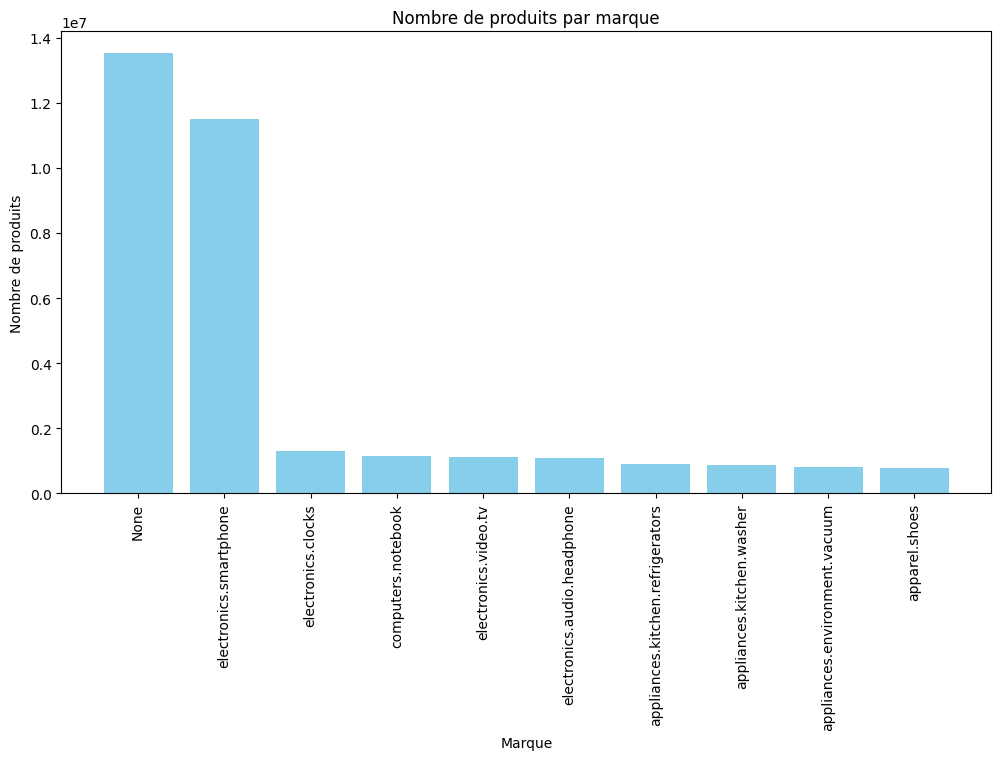

In [30]:
import matplotlib.pyplot as plt

pdf['category_code'] = pdf['category_code'].astype(str)
pdf['count'] = pdf['count'].astype(int)
pdf_sorted = pdf.sort_values(by='count', ascending=False)


top_10_pdf = pdf_sorted.head(10)
# Graphique des marques avec Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(top_10_pdf['category_code'], top_10_pdf['count'], color='skyblue')df
plt.xlabel('Marque')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par marque')
plt.xticks(rotation=90)
plt.show()

pdf.head()
spark.stop()

In [31]:
top_10_pdf.head()

,category_code,count
27,None,13515609
62,electronics.smartphone,11507231
54,electronics.clocks,1311033
75,computers.notebook,1137623
79,electronics.video.tv,1113750


In [43]:
pdf['event_type'].head()

KeyError: 'event_type'